# Assignment 11: Machine Learning

Please read the tasks description carefully and implement **only** what the tasks ask you to implement. Closely following the task descriptions will be beneficial, so keep your divergence in check - the test cases below each input cell are the gold standard. Finally, for this assignment, you do not need any error handling, you can assume that all input to your function will be valid.

As for the other assignments, using `print` is encouraged to test your implementation but is never required. Make sure not to confuse `return` and `print` statements: If your function has to **return** something, use the `return` statement. 

Try to implement the tasks yourself or in a small team. If you blindly copy a solution from the Internet or other students, you will not take home any learnings. Rather, make an effort to understand the solution! Furthermore, do not modify the _test cells_ - if you do, you effectively cheat the system which is not helpful for your learning process.

Some aspects of this assignment require you to <strong>self-study</strong> and do some research beyond the lecture contents - use your favorite search engine to look up documentation, usage examples, and definitions of the mentioned functions. There might be tasks where you have to read and investigate the [Python Standard Library](https://docs.python.org/3/library/) to find the documentation for a function that is used or that you want to use.

This assignment will use the third-party modules  [NumPy](https://numpy.org/https://numpy.org/), [pandas](https://pandas.pydata.org/), [matplotlib](https://matplotlib.org/), and [scikit-learn](https://scikit-learn.org/https://scikit-learn.org/).

In [1]:
# We'll import pandas and matplotlib:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

---
# Task 1: IRIS-Classification

Remember [IRIS](https://archive.ics.uci.edu/ml/datasets/Iris) from last Assignment? Now, we want to classify flowers based on the four available **features**.

1. We have to load the data.
1. We analyse the data.
1. Then, we **must** split the data into a training and testing subset.
1. Then, we load and train a classifier.
1. Report on the metrics.

In [2]:
import sklearn.datasets

iris_features, iris_labels = [sklearn.datasets.load_iris().get(k) for k in ('data', 'target')]

iris_label_to_class = {
    0: "setosa",
    1: "versicolor",
    2: "virginica"
}

---
## Task 1.1: Investigate the data

In order to know what the data is about, we first have to investigate the data. Visually, this can be done with plots.

In the last assigment, we already have drawn a boxplot of the four features for each flower. But what is the distribution of the target labels?

Use `matplotlib` (`plt`) to visualize the distribution of the labels of the IRIS dataset.

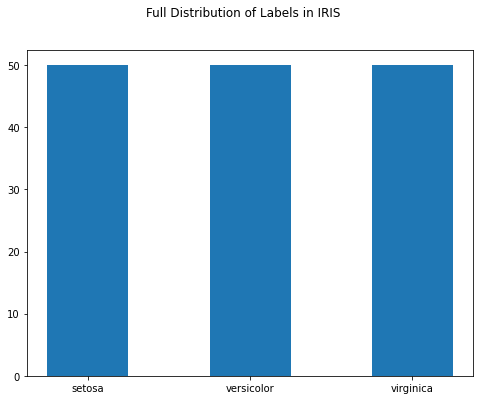

In [3]:
# There are many different possible solutions.

### BEGIN SOLUTION

counts = np.bincount(iris_labels)

fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(iris_label_to_class.values(), counts, width=0.5)

fig.suptitle("Full Distribution of Labels in IRIS")

plt.show()
### END SOLUTION

---
## Task 1.2: The Train-Test-Split

For **any** proper machine learning experiment, we **must** split the data into a **mutually exclusive** train and test set.

Find a function from the [sklearn documentation](https://duckduckgo.com/?t=ffab&q=sklearn+how+to+train+test+split&ia=web) that splits the IRIS data, given as `iris_features` and `iris_labels` into **70%** for training and **30%** for testing.

Call the results accordingly: `X_train`, `y_train`, `X_test`, `y_test`

In [4]:
### BEGIN SOLUTION

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    iris_features,
    iris_labels,
    random_state=23, train_size=0.7
)

### END SOLUTION

In [5]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(105, 4) (45, 4) (105,) (45,)


In [6]:
# Test Cell.
from unittest import TestCase
test_case = TestCase()

# Existance
test_case.assertTrue('X_train' in locals(), msg='You have to call the train features `X_train`.')
test_case.assertTrue('X_test' in locals(), msg='You have to call the test features `X_test`.')
test_case.assertTrue('y_train' in locals(), msg='You have to call the train target classes `y_train`.')
test_case.assertTrue('y_test' in locals(), msg='You have to call the test target classes `y_test`.')

# Datatypes
test_case.assertIsInstance(X_train, np.ndarray, msg='Your features (`X_train`) has the wrong datatype.')
test_case.assertIsInstance(X_test, np.ndarray, msg='Your features (`X_test`) has the wrong datatype.')
test_case.assertIsInstance(y_train, np.ndarray, msg='Your features (`y_train`) has the wrong datatype.')
test_case.assertIsInstance(y_test, np.ndarray, msg='Your features (`y_test`) has the wrong datatype.')

# Shapes
test_case.assertEqual(X_train.shape, (105, 4), msg='The shape of `X_train` is wrong.')
test_case.assertEqual(X_test.shape, (45, 4), msg='The shape of `X_test` is wrong.')
test_case.assertEqual(y_train.shape, (105,), msg='The shape of `y_train` is wrong.')
test_case.assertEqual(y_test.shape, (45,), msg='The shape of `y_test` is wrong.')

print("\n\033[37;42;2m  Success! Your code works as intended.  \033[0m\n")


  Success! Your code works as intended.  



---
# Task 1.3: Classification

Use the overview from the lecture slides (or [sklearn directory](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)) to select a classifier. (Ignore the first step about the "< 50 examples".)
Then, use the defined `X_train` and `y_train` to train this classifier.

Then, use this classifier and let it classify the test set.
Store the result in the variable `y_pred`. (_pred_ is short for predicitions).

(There is no test case for this task. Also, there might be a warning about _nonconvergence_. You can ignore that as well. It appears, because there are not enough samples.)

In [7]:
### BEGIN SOLUTION

# For this task, there can me multiple solutions.
# However, if we follow strictly the referenced map, LinearSVC is the way to go.
from sklearn.svm import LinearSVC

clf = LinearSVC()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

### END SOLUTION

c:\Users\Jannis\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


---
# Task 1.4: Metrics

Use the functions, `accuracy_score()`, `precision_recall_fscore_support()`, and `classification_report()` to compute their respective metrics and print them on the console. For Precision, Recall, and F-Score use the _macro_ average.

In [8]:
### BEGIN SOLUTION

from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report

accuracy = accuracy_score(y_test, y_pred)
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred, average='macro')
report = classification_report(y_test, y_pred, target_names=iris_label_to_class.values())


print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F-Score:   {fscore:.4f}")

print(report)

### END SOLUTION

Accuracy:  0.9778
Precision: 0.9778
Recall:    0.9744
F-Score:   0.9752
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       0.93      1.00      0.97        14
   virginica       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



---
# Task 2: K-Nearest Neighbors

We could use the `KNearestNeighbors` classifier from sklearn but in order to understand the math and mechanics, it is helpful to implement this ourselves.

Define the function `k_nearest_neighbors(node, nodes, k=5)` with the three parameters:
* `node`: The numerical features for ONE node
* `nodes`: A dictionary with the class name as keys and as values, 13-dimensional numpy arrays (the features)
* `k=5`: Number of neighbors to determine, defaults to `5`.

Return the class name for with the given node is closet throughout all features. Do not use sklearn here but compute it manually with brute-force.

For this task, we'll use the [Wine](https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-recognition-dataset) dataset.

Use the **euclidean distance** to compute the distance between to points
$$
    d(p, q) = \sqrt{ (p_1 - q_1)^2 + (p_2 - q_2)^2 + \dots + (p_n - q_n)^2}
$$


Print the `classification_report` for your predictions.
It will look like this. Why are your numbers different?

```
              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       1.00      0.62      0.77         8
           2       0.43      1.00      0.60         3

    accuracy                           0.78        18
   macro avg       0.81      0.83      0.76        18
weighted avg       0.90      0.78      0.80        18
```

In [9]:
# This cell creates example data for the wine dataset
import sklearn.datasets
from sklearn.model_selection import train_test_split

wine = pd.DataFrame(sklearn.datasets.load_wine(as_frame=True).frame)
wine_train, wine_test = train_test_split(wine, train_size=0.90)

wine_X_train = wine_train.to_numpy()[:, :-1]
wine_y_train = wine_train.target.to_numpy()
wine_X_test = wine_test.to_numpy()[:, :-1]
wine_y_test = wine_test.target.to_numpy()

TRAIN_NODES = {target: wine_train[wine_train.target == target].to_numpy()[:, :-1] for target in wine_train.target.unique()}

In [10]:
### BEGIN SOLUTION

def k_nearest_neighbors(node, nodes, k=5):
    
    # we save the distances as tuples: (distance, class_id)
    distances = []
    
    for class_id, class_features in nodes.items():
        for class_feature in class_features:
            distances.append((np.sqrt(np.sum((node - class_feature) ** 2)), class_id))

    # Now, we sort ASCENDING by the 0th entry (the distance)
    distances = sorted(distances, key=lambda d: d[0], reverse=False)
    
    k_neighbors = [n[1] for n in distances[:k]]

    # Select the one that appear the most:
    highest_count = max(k_neighbors, key=k_neighbors.count)
    
    return highest_count

### END SOLUTION

wine_y_pred = [
    k_nearest_neighbors(sample, TRAIN_NODES)
    for sample in wine_X_test
]

In [11]:
### BEGIN SOLUTION

from sklearn.metrics import classification_report

report = classification_report(
    y_true=wine_y_test,
    y_pred=wine_y_pred
)    

print(report)
### END SOLUTION

              precision    recall  f1-score   support

           0       0.60      0.75      0.67         4
           1       0.83      0.71      0.77         7
           2       0.57      0.57      0.57         7

    accuracy                           0.67        18
   macro avg       0.67      0.68      0.67        18
weighted avg       0.68      0.67      0.67        18



---
## Task 2.2: sklearn KNeighbors

You just implemented K-Nearest-Neighbors yourself.
Now use sklearn's implementation, fit it on the training data and use the test data to predict their class.

Like above, print the `classification_report`.

The numbers here must be the same as from above.

In [12]:
### BEGIN SOLUTION
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5, algorithm='brute', metric='euclidean')
clf.fit(wine_X_train, wine_y_train)
wine_y_pred = clf.predict(wine_X_test)

report = classification_report(
    y_true=wine_y_test,
    y_pred=wine_y_pred
)    

print(report)
### END SOLUTION

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         4
           1       0.83      0.71      0.77         7
           2       0.50      0.29      0.36         7

    accuracy                           0.61        18
   macro avg       0.61      0.67      0.60        18
weighted avg       0.63      0.61      0.59        18

